In [1]:
#import necessary libraries

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
#%matplotlib widget


In [2]:
#tell python where the data is located, based on the current folder
filePath = "..//..//data//"
# tell what is the file name we will open and load data
fileName = "output2022-01-20T11_12_09.csv"



In [3]:
#load data into "data" variable
data = pd.read_csv(filePath+fileName)
#display data
data

,topLeft.Item1.width,topLeft.Item1.height,topLeft.Item1.avgBright,topLeft.Item2.width,topLeft.Item2.height,topLeft.Item2.avgBright,topLeft.Item3.width,topLeft.Item3.height,topLeft.Item3.avgBright,topLeft.Item4.width,...,bottomRight.Item3.avgBright,bottomRight.Item4.width,bottomRight.Item4.height,bottomRight.Item4.avgBright,bottomRight.Item5.width,bottomRight.Item5.height,bottomRight.Item5.avgBright,bottomRight.Item6.width,bottomRight.Item6.height,bottomRight.Item6.avgBright
0,10,30,63.140000,11,30,56.236364,12,28,58.592262,11,...,60.953846,11,32,63.292614,12,30,60.419444,11,28,68.454545
1,10,30,63.290000,11,30,56.178788,12,28,58.651786,11,...,60.935897,11,32,63.309659,12,30,60.500000,11,28,68.500000
2,10,30,63.163333,11,30,56.251515,12,28,58.613095,11,...,60.976923,11,32,63.338068,12,30,60.452778,11,28,68.412338
3,10,30,63.163333,11,30,56.103030,12,28,58.654762,11,...,61.043590,11,32,63.303977,11,30,63.221212,11,28,68.457792
4,10,30,63.223333,10,30,59.033333,12,28,58.595238,11,...,60.992308,11,32,63.414773,12,30,60.572222,11,28,68.376623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91794,11,32,84.815341,14,36,64.555556,13,30,71.317949,11,...,79.000000,12,32,91.877604,12,30,88.761111,12,30,84.900000
91795,11,32,85.281250,14,36,64.619048,13,30,71.051282,12,...,79.170673,12,32,91.703125,12,32,85.635417,12,28,88.464286
91796,11,32,85.457386,14,36,64.472222,13,30,70.746154,11,...,79.466346,11,32,97.843750,12,30,88.969444,12,30,85.425000
91797,10,32,91.396875,14,36,64.660714,13,30,70.902564,11,...,79.387019,11,32,98.306818,12,30,89.147222,12,30,85.561111


In [4]:
#show the names of each column
# from this we learn that the data is organised pairwise, that is every two columns come from a specific ROI,
# with the first column being the average brightness of a ROI and the second the running average of the same ROI
#print(data.columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91799 entries, 0 to 91798
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   topLeft.Item1.width          91799 non-null  int64  
 1   topLeft.Item1.height         91799 non-null  int64  
 2   topLeft.Item1.avgBright      91799 non-null  float64
 3   topLeft.Item2.width          91799 non-null  int64  
 4   topLeft.Item2.height         91799 non-null  int64  
 5   topLeft.Item2.avgBright      91799 non-null  float64
 6   topLeft.Item3.width          91799 non-null  int64  
 7   topLeft.Item3.height         91799 non-null  int64  
 8   topLeft.Item3.avgBright      91799 non-null  float64
 9   topLeft.Item4.width          91799 non-null  int64  
 10  topLeft.Item4.height         91799 non-null  int64  
 11  topLeft.Item4.avgBright      91799 non-null  float64
 12  topLeft.Item5.width          91799 non-null  int64  
 13  topLeft.Item5.he

In [5]:

#grab every other column so that we are only using the average brightness in each ROI (discarding rolling average calculated with Bonsai)
#allBright=data[data.columns[2::3]]
allBright=data
#calculate rolling average for each ROI and subtract that from brightness value
roll = 60
rolling = allBright.rolling(window=roll).mean()
subtracted = allBright-rolling

#make all values positive by squaring all values than getting the square root
module = np.sqrt(subtracted**2)


#plt.hist(module[module.columns[0]],bins=50)

,topLeft.Item1.width,topLeft.Item1.height,topLeft.Item1.avgBright,topLeft.Item2.width,topLeft.Item2.height,topLeft.Item2.avgBright,topLeft.Item3.width,topLeft.Item3.height,topLeft.Item3.avgBright,topLeft.Item4.width,...,bottomRight.Item3.avgBright,bottomRight.Item4.width,bottomRight.Item4.height,bottomRight.Item4.avgBright,bottomRight.Item5.width,bottomRight.Item5.height,bottomRight.Item5.avgBright,bottomRight.Item6.width,bottomRight.Item6.height,bottomRight.Item6.avgBright
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91794,0.366667,0.0,3.079683,0.183333,0.05,0.766413,0.35,0.266667,1.783510,0.116667,...,0.614593,0.483333,1.000000,4.350194,0.0,0.233333,0.273788,0.300000,1.933333,5.067738
91795,0.366667,0.0,2.616520,0.183333,0.05,0.703483,0.35,0.266667,2.038296,0.866667,...,0.428695,0.466667,0.966667,4.384978,0.0,1.766667,2.858244,0.300000,0.066667,1.491796
91796,0.366667,0.0,2.439437,0.183333,0.05,0.848027,0.35,0.250000,2.341799,0.133333,...,0.124088,0.533333,0.933333,1.790827,0.0,0.233333,0.469117,0.300000,1.900000,4.475566
91797,0.616667,0.0,3.398835,0.183333,0.05,0.659072,0.35,0.250000,2.159021,0.133333,...,0.189433,0.533333,0.900000,2.281559,0.0,0.233333,0.639673,0.300000,1.866667,4.295334


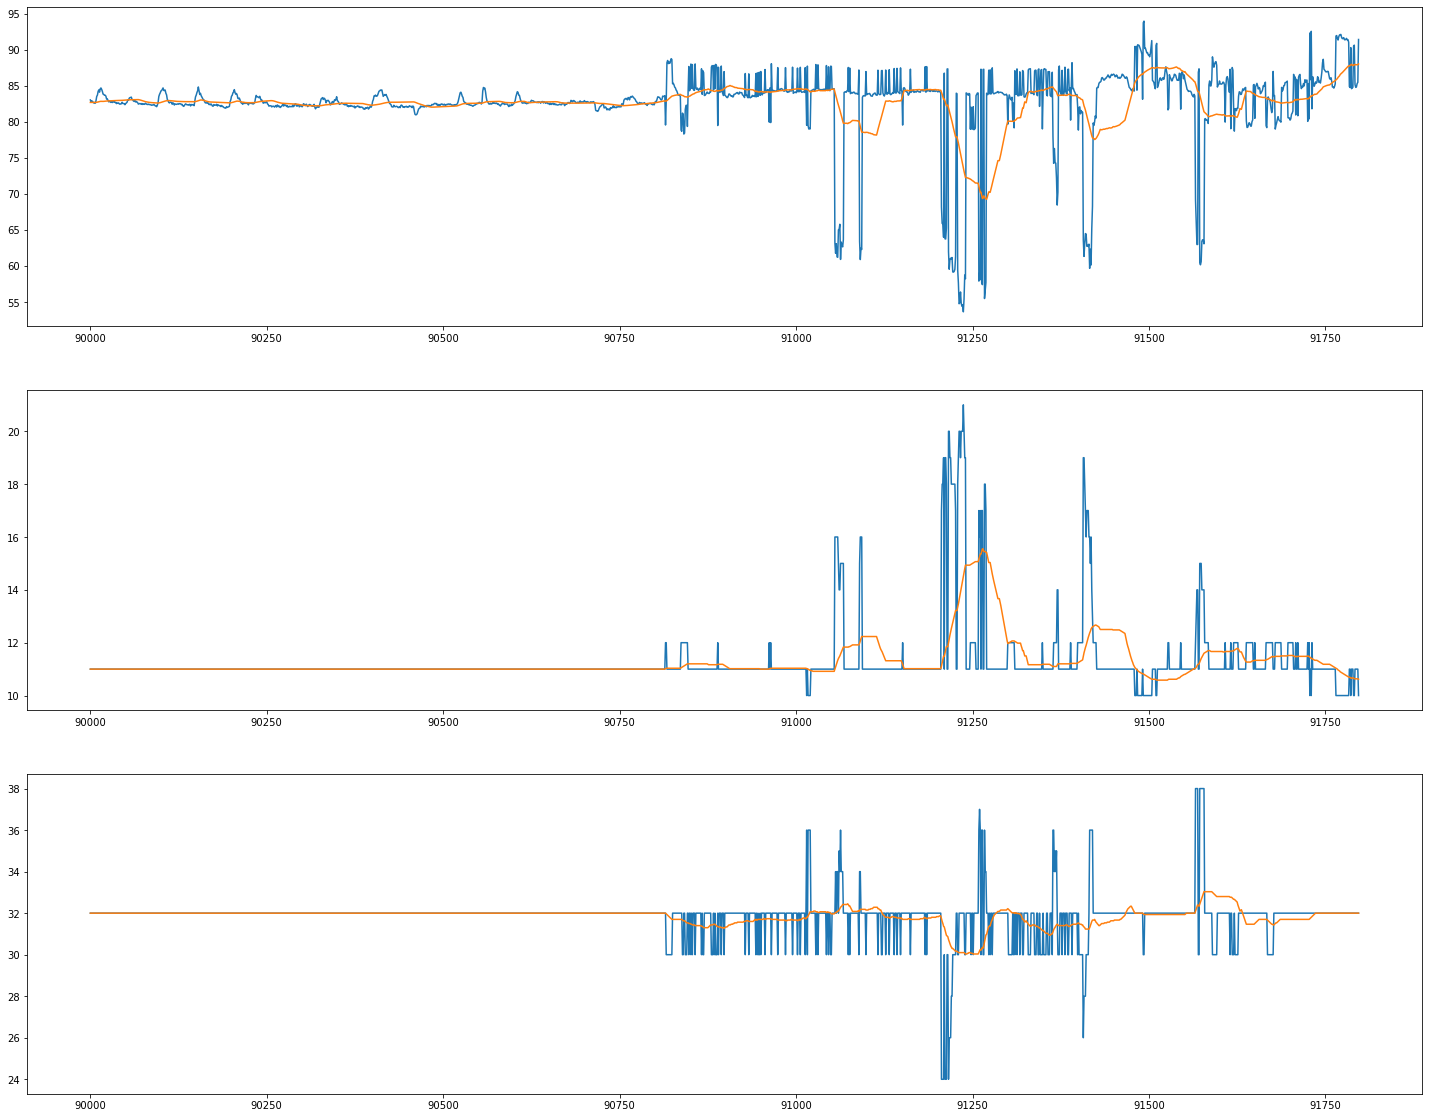

In [8]:
start = 90000
end = -1
fig = plt.figure(figsize=[25,20])
sub1=plt.subplot(3,1,1)
plt.plot(data["topLeft.Item1.avgBright"][start:end])
plt.plot(rolling["topLeft.Item1.avgBright"][start:end])
sub2=plt.subplot(3,1,2)
plt.plot(data["topLeft.Item1.width"][start:end])
plt.plot(rolling["topLeft.Item1.width"][start:end])
sub3=plt.subplot(3,1,3)
plt.plot(data["topLeft.Item1.height"][start:end])
plt.plot(rolling["topLeft.Item1.height"][start:end])

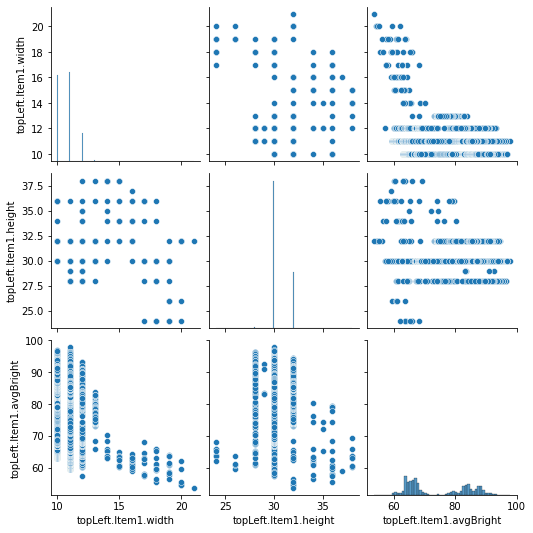

In [9]:
sns.pairplot(data.iloc[:,0:3])

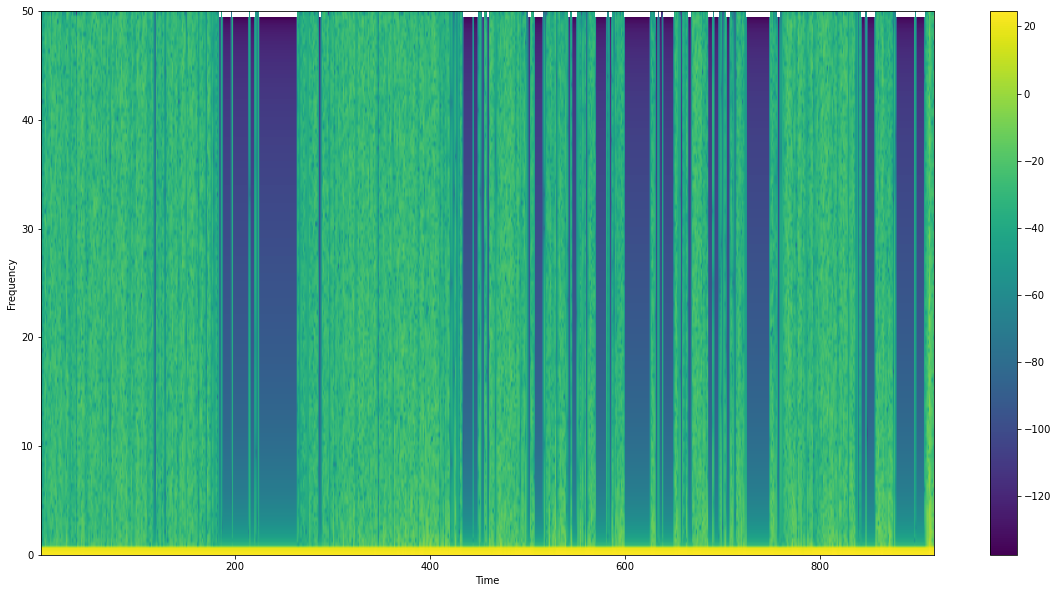

In [43]:
#plt.plot(detrended.ROI1[0:3000])
fig = plt.figure(figsize=[20,10])
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(data["topLeft.Item1.width"], Fs=100)
plt.xlabel('Time')
plt.ylabel('Frequency')
fig.colorbar(imageAxis)

6.370833333333334